In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dense, Flatten,Layer, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from keras import Model
from keras.utils import np_utils
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential

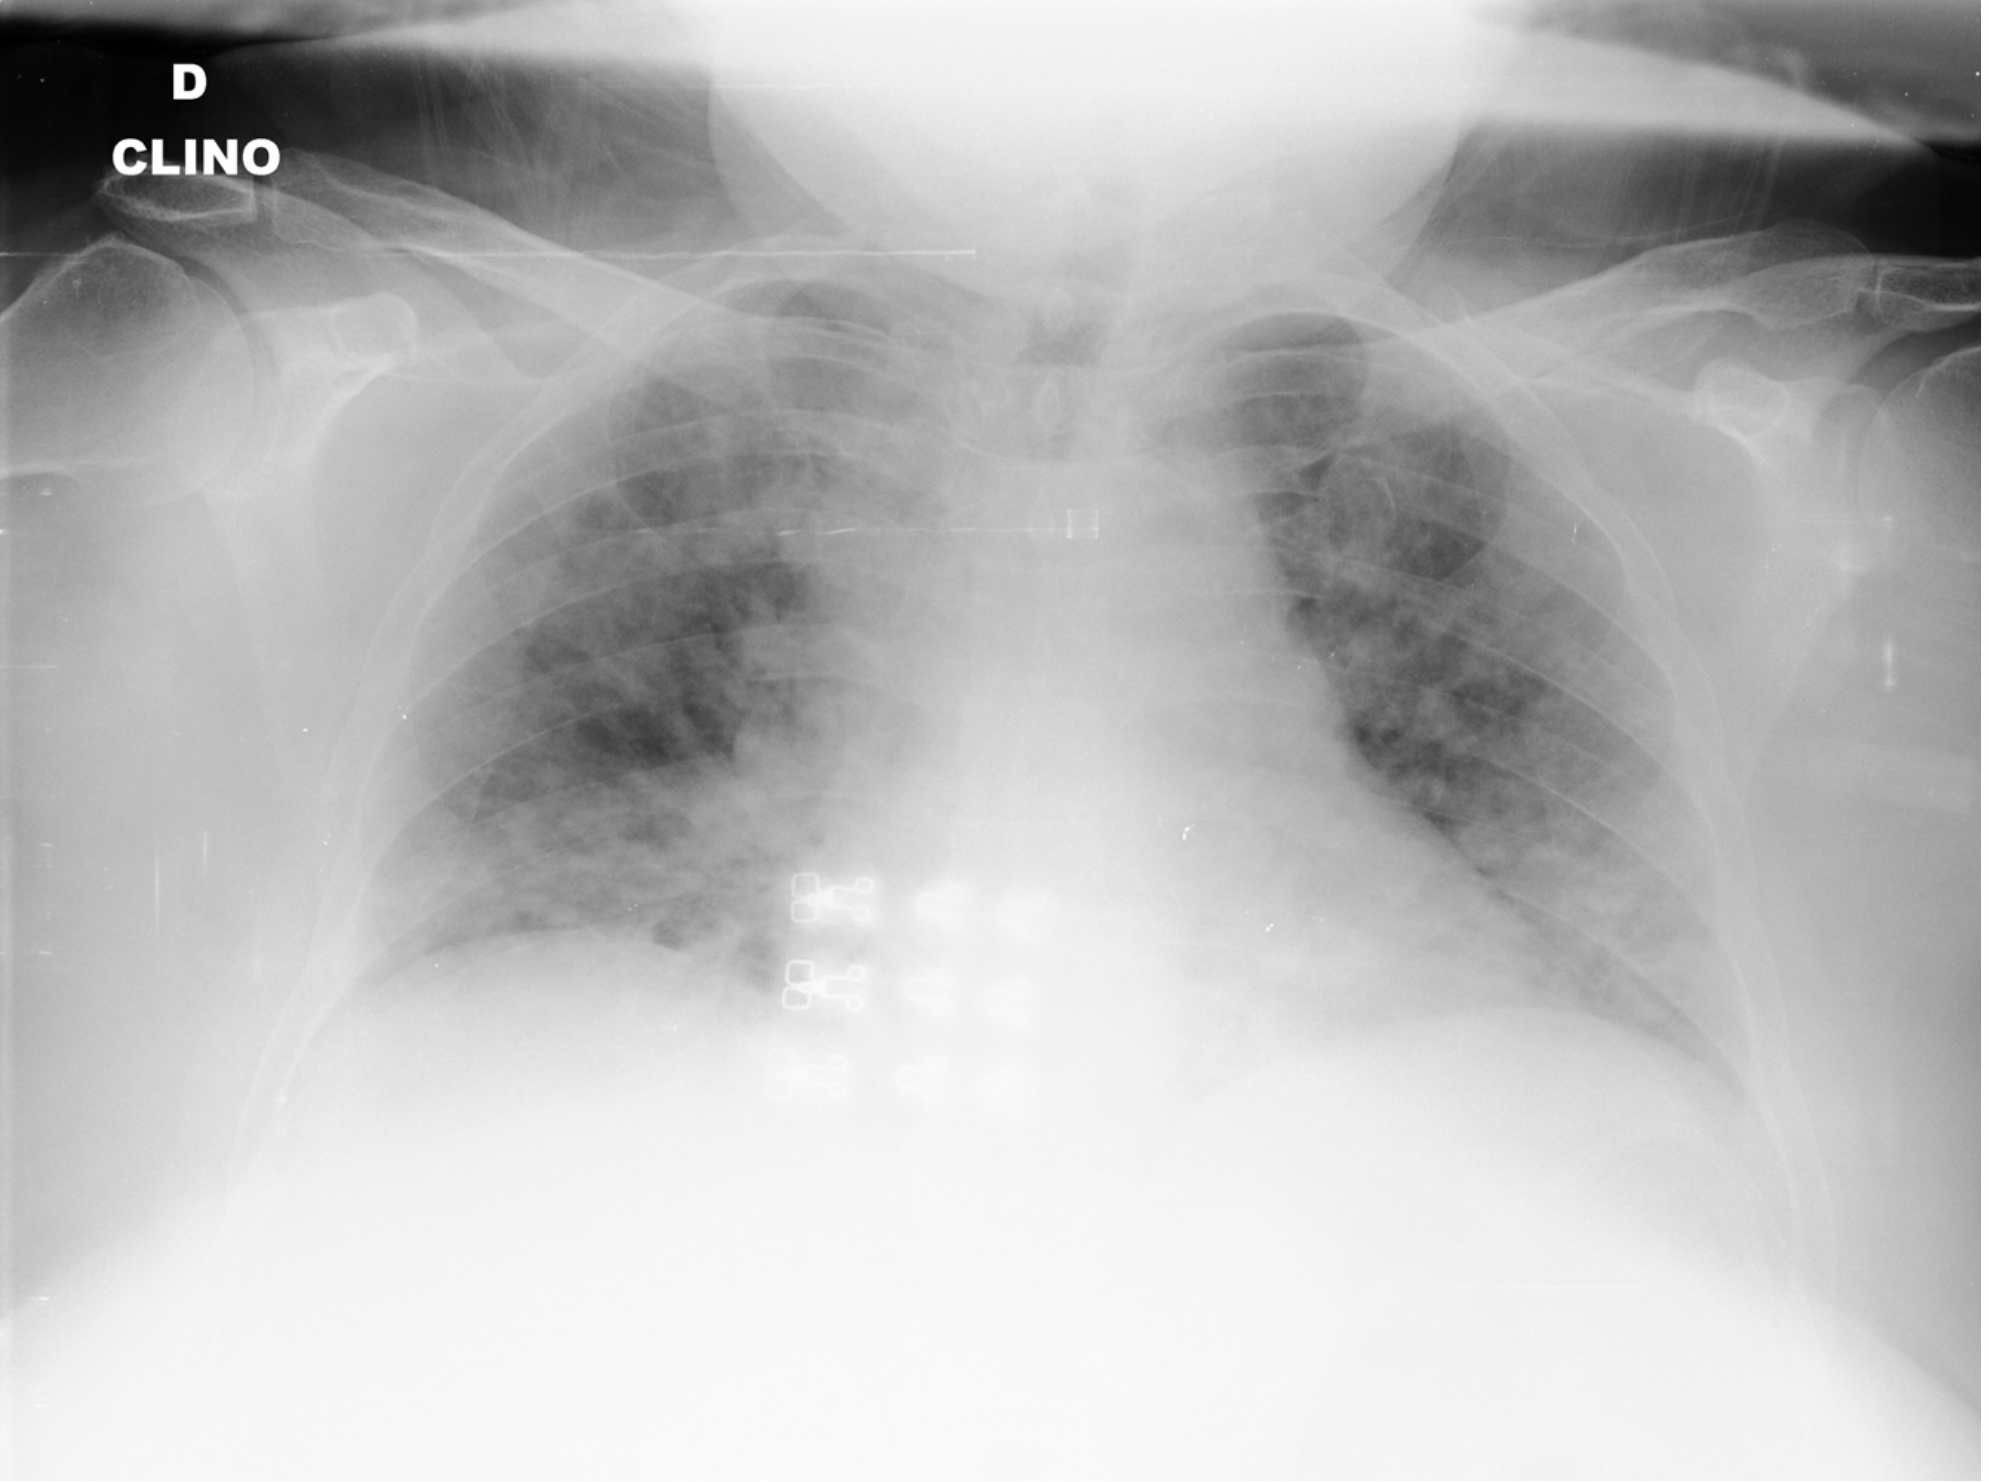

In [2]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
window_name = 'img'
cv2_imshow(img)

In [3]:
image_names = os.listdir('/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Train/Covid')

In [4]:
X_train = []
y_train = []
for i in range(len(image_names)):
  try:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Train/Covid/' + image_names[i])
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append(0)
  except:
    pass

In [5]:
print(len(X_train))

112


In [6]:
image_names = os.listdir("/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Train/Normal")

In [7]:
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Train/Normal/" + image_names[i])
    img = cv2.resize(img,(224,224))
    X_train.append(img)
    y_train.append(1)
  except:
    pass

In [8]:
print(X_train[0], y_train[0])

[[[ 12  12  12]
  [ 13  13  13]
  [ 12  12  12]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 13  13  13]]

 [[ 13  13  13]
  [ 13  13  13]
  [ 14  14  14]
  ...
  [ 13  13  13]
  [ 12  12  12]
  [ 12  12  12]]

 [[ 12  12  12]
  [ 12  12  12]
  [119 119 119]
  ...
  [ 13  13  13]
  [ 12  12  12]
  [ 12  12  12]]

 ...

 [[ 10  10  10]
  [ 11  11  11]
  [ 10  10  10]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 10  10  10]
  [ 11  11  11]
  [ 11  11  11]]

 [[ 11  11  11]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 11  11  11]
  [ 11  11  11]
  [ 11  11  11]]] 0


In [9]:
X_test = []
y_test = []
image_names = os.listdir("/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Val/Covid")
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Val/Covid/" + image_names[i])
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append(0)
  except:
    pass

In [10]:
image_names = os.listdir("/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Val/Normal")
for i in range(len(image_names)):
  try:
    img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Covid Detection/CovidDataset/Val/Normal/" + image_names[i])
    img = cv2.resize(img,(224,224))
    X_test.append(img)
    y_test.append(1)
  except:
    pass

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [12]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
print(X_train[0], X_test[0])

[[[0.04705882 0.04705882 0.04705882]
  [0.05098039 0.05098039 0.05098039]
  [0.04705882 0.04705882 0.04705882]
  ...
  [0.04705882 0.04705882 0.04705882]
  [0.04705882 0.04705882 0.04705882]
  [0.05098039 0.05098039 0.05098039]]

 [[0.05098039 0.05098039 0.05098039]
  [0.05098039 0.05098039 0.05098039]
  [0.05490196 0.05490196 0.05490196]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.04705882 0.04705882 0.04705882]
  [0.04705882 0.04705882 0.04705882]]

 [[0.04705882 0.04705882 0.04705882]
  [0.04705882 0.04705882 0.04705882]
  [0.46666667 0.46666667 0.46666667]
  ...
  [0.05098039 0.05098039 0.05098039]
  [0.04705882 0.04705882 0.04705882]
  [0.04705882 0.04705882 0.04705882]]

 ...

 [[0.03921569 0.03921569 0.03921569]
  [0.04313725 0.04313725 0.04313725]
  [0.03921569 0.03921569 0.03921569]
  ...
  [0.04313725 0.04313725 0.04313725]
  [0.04313725 0.04313725 0.04313725]
  [0.04313725 0.04313725 0.04313725]]

 [[0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569]


In [15]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(224, 224, 224, 3) (60, 224, 224, 3) (224,) (60,)


In [16]:
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)

In [17]:
print(y_train.shape,y_test.shape)

(224, 2) (60, 2)


In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation= 'relu', input_shape= (224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                12616736  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 12,617,698
Trainable params: 12,617,698
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [21]:
r = model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data = (X_test, y_test) )

Epoch 1/10
3/3 [==============================] - 8s 2s/step - loss: 1.9665 - accuracy: 0.4903 - val_loss: 11.4225 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 8.2876 - accuracy: 0.5208 - val_loss: 4.9072 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 3.8908 - accuracy: 0.5276 - val_loss: 0.2675 - val_accuracy: 0.9500
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.4118 - accuracy: 0.8840 - val_loss: 0.7241 - val_accuracy: 0.7667
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.7200 - accuracy: 0.7915 - val_loss: 0.2220 - val_accuracy: 0.9333
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.1999 - accuracy: 0.9395 - val_loss: 0.3770 - val_accuracy: 0.9167
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.2031 - accuracy: 0.9311 - val_loss: 0.3014 - val_accuracy: 0.9167
Epoch 8/10
3/3 [========================

In [22]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 237ms/step - loss: 0.1380 - accuracy: 0.9500


[0.138030543923378, 0.949999988079071]

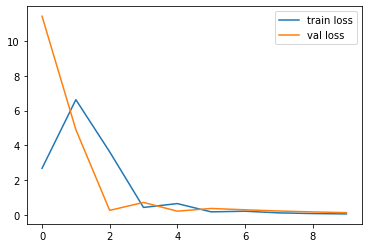

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

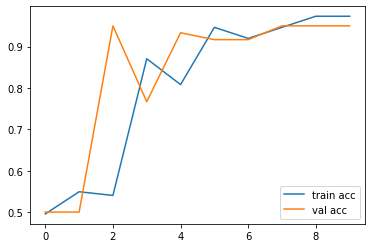

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
from tensorflow.keras.models import load_model

model.save('model_CNN4.h5')